# Tutorial 1: Basic NLP Pipeline
The goal of the first tutorial is to create an NLP pipeline and get familiar with the common NLP modules. You will be able to handle most of the tasks with pandas as well as the nltk module, which are the basis for many NLP projects. Please use a (Jupyter) notebook for your code, for keeping things clean, performative and easy to annotate. Believe me, it's worth the extra effort!

We will post "ideal solutions" to the tutorials, but the "live coding" of a solution in the tutorial session and talking about the hows and whys will only benefit you if you are prepared. To get the most from our sessions, try to solve everything beforehand, good questions and your input will contribute significantly to the quality of the tutorials!

## How to find Information
Since you will not directly be able to solve all tasks just from what we provide in the lectures, we will provide you with some relevant materials and online-tutorials. Don't worry if you cannot solve a task; ask in the GitHub discussion forum or wait until we talk about it in the tutorial session.

### Python 
If you need a little refreshment of your Python skills or want to quickly find well-structured information on certain aspects of Python, check out the tutorials and documentation on [W3 Schools](https://www.w3schools.com/python/default.asp). 

### Pandas 
Pandas is THE tool for tabular data in python. It comes with a lot of useful features, but is not always self-explanatory. However, there is an accelent [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) and a superb [tutorial](https://www.w3schools.com/python/pandas/default.asp) on Pandas, and we reccomend to check both out, especially the first few lessens of the tutorial! 

### NLTK
NLTK, the natural language toolkit, as the name suggests, provides virtually everything you need for natural language processing in python. Although Spacy gets more popular quickly, NLTK is still the most used module for most preprocessing and analysis tasks. Find the documentation on the [official website](https://www.nltk.org/), but thanks to the popularity, almost every problem was already discussed and every question answered somewhere on the internet and almost always, a google search for a description of a problem or an error message leads to a solution. 


## 1: Installation and Import
### 1.1 Installation and Import of NLP Modules

Make sure that the required modules "pandas", "numpy", "nltk", "sklearn", "spacy" and "re" are imported and get the version numbers of the modules.

Hint: Use <code>! pip install NAMEOFMODULE</code> to run command line / shell commands from your python jupyter notebook and install modules without having to use your terminal. 


In [1]:
import pandas as pd
print ("pandas", pd.__version__)

import numpy as np
print ("numpy", np.__version__)

import nltk
print ("nltk", nltk.__version__)

import re
print ("re", re.__version__)

import sklearn
print ("sklearn", sklearn.__version__)


pandas 1.3.4
numpy 1.22.3
nltk 3.7
re 2.2.1
sklearn 1.0.1


### 1.2 Import of "Quality-of-Life Modules"
Install "pandarallel". Import pandarallel's method "pandarallel" (for parallelization in pandas) and initialize it with pandarallel.initialize(). Consult pandarallel's documentation or google if you need help with using pandarallel.


In [2]:
# quality of life improvements
from pandarallel import pandarallel  # parallelization
pandarallel.initialize()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


## 2: Import Data
In this tutorial you will work with a dataset of jokes. These were collected using crawlers from the platforms "stupidstuff.org", "wocka.com" as well as "reddit.com".   

Read in the attached .json files as pandas dataframes and merge them into a single dataframe. When doing so, make sure that the source of the data is preserved as a key.

In [3]:
dfs = [pd.read_json("stupidstuff.json")[:100], pd.read_json("reddit.json")[:100], pd.read_json("wocka.json")[:100]]
data = pd.concat(dfs, keys=["stupidstuff", "reddit", "wocka"])
data.loc["reddit"]

,body,category,id,rating,score,title
0,"Now I have to say ""Leroy can you please paint the fence?""",NaN,5tz52q,NaN,1.0,I hate how you cant even say black paint anymore
1,Pizza doesn't scream when you put it in the oven .\n\nI'm so sorry.,NaN,5tz4dd,NaN,0.0,What's the difference between a Jew in Nazi Germany and pizza ?
2,"...and being there really helped me learn about American culture. So I visited a shop and as I was leaving, the Shopkeeper said ""Have a nice day!"" But I didn't so I sued him.",NaN,5tz319,NaN,0.0,I recently went to America....
3,"A Sunday school teacher is concerned that his students might be a little confused about Jesus, so he asks his class, “Where is Jesus today?”\nBrian raises his hand and says, “He’s in Heaven.”\n\nSusan answers, “He’s in my heart.”\n\nLittle Johnny waves his hand furiously and blurts out, “He’s in our bathroom!”\n\nThe teacher is surprised by this answer and asks Little Johnny how he knows this.\n\n“Well,” Little Johnny says, “every morning, my Dad gets up, bangs on the bathroom door and yells ‘Jesus Christ, are you still in there?'”",NaN,5tz2wj,NaN,1.0,"Brian raises his hand and says, “He’s in Heaven.”"
4,He got caught trying to sell the two books to a freshman.,NaN,5tz1pc,NaN,0.0,"You hear about the University book store worker who was charged for stealing $20,000 worth of books?"
...,...,...,...,...,...,...
95,"So if you're a great driver, look out for women who are turning.",NaN,5txmyo,NaN,16.0,A lot of women turn into great drivers...
96,Blonde #1: Oh how I hate when he brings me flowers. All night I'll be on my back with my legs in the air.\nBlonde #2: Don't you own a vase?,NaN,5txmlh,NaN,4.0,Valentines Day Flowers
97,Espn2,NaN,5txm9l,NaN,2.0,#1 Uconn women's team going for historic 100th consecutive team in a sold out stadium against #6 South Carolina
98,"He breaks into a house to look for money and guns and finds a young couple in bed.\n\nHe orders the guy out of bed and ties him to a chair, while tying the girl to the bed he gets on top of her, kisses her neck, then gets up and goes into the bathroom. While he's in there, the husband tells his wife:\n\n""Listen, this guy's an escaped convict, look at his clothes! He probably spent lots of time in jail and hasn't seen a woman in years. I saw how he kissed your neck."" If he wants sex, don't resist, don't complain, do whatever he tells you. Satisfy him no matter how much he nauseates you. This guy is probably very dangerous. If he gets angry, he'll kill us. Be strong, honey. I love you.""\n\nTo which his wife responds: ""He wasn't kissing my neck. He was whispering in my ear. He told me he was gay, thought you were cute, and asked me if we had any vaseline. I told him it was in the bathroom. Be strong honey. I love you too!!""",NaN,5txluy,NaN,6.0,A man escapes from prison where he has been for 15 years


In [4]:
data

body  \
stupidstuff 0   A blackjack dealer and a player with a thirtee...   
            1   At a dinner party, several of the guests were ...   
            2   One day this cop pulls over a blonde for speed...   
            3   Three women are about to be executed for crime...   
            4   A girl came skipping home FROM school one day....   
...                                                           ...   
wocka       95  A first grade teacher collected well-known pro...   
            96  Alabama:\r\nAt Least We're not Mississippi\r\n...   
            97  Q: What is your date of birth? \r\nA: July fif...   
            98  (Setting: A furious lightsaber duel is underwa...   
            99  At one point during a game, the coach said to ...   

                    category   id  rating  score                 title  
stupidstuff 0       Children    1    2.63    NaN                   NaN  
            1   Blonde Jokes    2    2.57    NaN                   NaN  
            2   Blonde Jokes    3    3.09    NaN                   NaN  
            3   Blonde Jokes    4    4.10    NaN                   NaN  
            4   Blonde Jokes    5    4.30    NaN                   NaN  
...                      ...  ...     ...    ...                   ...  
wocka       95  Other / Misc  103     NaN    NaN              Proverbs  
            96  Other / Misc  104     NaN    NaN         State Slogans  
            97  Other / Misc  105     NaN    NaN  Things Said In Court  
            98  Other / Misc  106     NaN    NaN  Real Skywalker Scene  
            99        Sports  107     NaN    NaN            Good Sport  

[300 rows x 6 columns]

In [5]:
len(data)

300

## 3: Data Preprocessing
As is very often the case with crawled data, the data from the different sources are very differently sourced and tagged. 
### 3.1 Clean up text
Prepare the data so that the "body" column contains the entire text of the joke and that no format tokens (e.g. "\n") are included.

In [6]:
data.loc["reddit"]["body"] = data.loc["reddit"].parallel_apply(lambda row: row["title"]+" "+row["body"], axis=1)
data.loc["reddit"]

<ipython-input-6-20f353993307>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc["reddit"]["body"] = data.loc["reddit"].parallel_apply(lambda row: row["title"]+" "+row["body"], axis=1)


,body,category,id,rating,score,title
0,"I hate how you cant even say black paint anymore Now I have to say ""Leroy can you please paint the fence?""",NaN,5tz52q,NaN,1.0,I hate how you cant even say black paint anymore
1,What's the difference between a Jew in Nazi Germany and pizza ? Pizza doesn't scream when you put it in the oven .\n\nI'm so sorry.,NaN,5tz4dd,NaN,0.0,What's the difference between a Jew in Nazi Germany and pizza ?
2,"I recently went to America.... ...and being there really helped me learn about American culture. So I visited a shop and as I was leaving, the Shopkeeper said ""Have a nice day!"" But I didn't so I sued him.",NaN,5tz319,NaN,0.0,I recently went to America....
3,"Brian raises his hand and says, “He’s in Heaven.” A Sunday school teacher is concerned that his students might be a little confused about Jesus, so he asks his class, “Where is Jesus today?”\nBrian raises his hand and says, “He’s in Heaven.”\n\nSusan answers, “He’s in my heart.”\n\nLittle Johnny waves his hand furiously and blurts out, “He’s in our bathroom!”\n\nThe teacher is surprised by this answer and asks Little Johnny how he knows this.\n\n“Well,” Little Johnny says, “every morning, my Dad gets up, bangs on the bathroom door and yells ‘Jesus Christ, are you still in there?'”",NaN,5tz2wj,NaN,1.0,"Brian raises his hand and says, “He’s in Heaven.”"
4,"You hear about the University book store worker who was charged for stealing $20,000 worth of books? He got caught trying to sell the two books to a freshman.",NaN,5tz1pc,NaN,0.0,"You hear about the University book store worker who was charged for stealing $20,000 worth of books?"
...,...,...,...,...,...,...
95,"A lot of women turn into great drivers... So if you're a great driver, look out for women who are turning.",NaN,5txmyo,NaN,16.0,A lot of women turn into great drivers...
96,Valentines Day Flowers Blonde #1: Oh how I hate when he brings me flowers. All night I'll be on my back with my legs in the air.\nBlonde #2: Don't you own a vase?,NaN,5txmlh,NaN,4.0,Valentines Day Flowers
97,#1 Uconn women's team going for historic 100th consecutive team in a sold out stadium against #6 South Carolina Espn2,NaN,5txm9l,NaN,2.0,#1 Uconn women's team going for historic 100th consecutive team in a sold out stadium against #6 South Carolina
98,"A man escapes from prison where he has been for 15 years He breaks into a house to look for money and guns and finds a young couple in bed.\n\nHe orders the guy out of bed and ties him to a chair, while tying the girl to the bed he gets on top of her, kisses her neck, then gets up and goes into the bathroom. While he's in there, the husband tells his wife:\n\n""Listen, this guy's an escaped convict, look at his clothes! He probably spent lots of time in jail and hasn't seen a woman in years. I saw how he kissed your neck."" If he wants sex, don't resist, don't complain, do whatever he tells you. Satisfy him no matter how much he nauseates you. This guy is probably very dangerous. If he gets angry, he'll kill us. Be strong, honey. I love you.""\n\nTo which his wife responds: ""He wasn't kissing my neck. He was whispering in my ear. He told me he was gay, thought you were cute, and asked me if we had any vaseline. I told him it was in the bathroom. Be strong honey. I love you too!!""",NaN,5txluy,NaN,6.0,A man escapes from prison where he has been for 15 years


In [7]:
data.loc["wocka"]["body"] = data.loc["wocka"].parallel_apply(lambda row: re.sub("(\n)|(\r)", " ", row["body"]), axis=1)
data.loc["wocka"]

<ipython-input-7-5502645b5ae3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc["wocka"]["body"] = data.loc["wocka"].parallel_apply(lambda row: re.sub("(\n)|(\r)", " ", row["body"]), axis=1)


,body,category,id,rating,score,title
0,What do you call a cow with no legs? Ground Beef!,Animal,1,NaN,NaN,Cow With No Legs
1,What do you call a cow jumping over a barbed wire fence? Utter destruction.,Animal,2,NaN,NaN,Jumping Cow
2,What's black and white and red all over? A newspaper.,Other / Misc,4,NaN,NaN,"Black, White and Red"
3,"So, this guy walks into a bar. And says, ""ouch"".",Bar,5,NaN,NaN,Guy in a Bar
4,"If the opposite of pro is con, isn't the opposite of progress, congress?",One Liners,6,NaN,NaN,Progress
...,...,...,...,...,...,...
95,"A first grade teacher collected well-known proverbs. She gave each kid in the class the first half of the proverb, and asked them to fill in the rest. Here's what the kids came up with: Better to be safe than... punch a 5th grader. Strike while the... bug is close. It's always darkest before... daylight savings time. Never underestimate the power of... termites. You can lead a horse to water but... how? Don't bite the hand that... looks dirty. No news is... impossible. A miss is as good as a... Mr. You can't teach an old dog... math. If you lie down with dogs, you... will stink in the morning. Love all, trust... me. The pen is mightier than... the pigs. An idle mind is... the best way to relax. Where there is smoke, there's... pollution. Happy is the bride who... gets all the presents. A penny saved is... not much. Two is company, three's... The Musketeers. None are so blind as... Helen Keller. Children should be seen and not... spanked or grounded. If at first you don't succeed... get new batteries. You get out of something what you... see pictured on the box. When the blind lead the blind... get out of the way. There is no fool like... Aunt Edie. Laugh and the whole world laughs with you. Cry and... you have to blow your nose.",Other / Misc,103,NaN,NaN,Proverbs
96,"Alabama: At Least We're not Mississippi Alaska: 11,623 Eskimos Can't be Wrong! Arizona: But It's a Dry Heat Arkansas: Litterasy Ain't Everthing California: As Seen on TV Colorado: If You Don't Ski, Don't Bother Connecticut: Like Massachusetts, Only Dirtier and With Less Character Delaware: We Really Do Like the Chemicals in our Water Florida: Ask Us About Our Grandkids Georgia: Without Atlanta we're Alabama Hawaii: Haka Tiki Mou Sha'ami Leeki Toru (Death to Mainland Scum, But Leave Your Money) Idaho: More Than Just Potatoes... Well Okay, We're Not, But The Potatoes Sure Are Real Good Illinois: Please Don't Pronounce the ""S"" Indiana: 2 Billion Years Tidal Wave Free Iowa: We Do Amazing Things With Corn Kansas: First Of The Rectangle States Kentucky: Five Million People; Seven Last Names Louisiana: We're Not All Drunk Cajun Wackos, But That's Our Tourism Campaign Maine: We're Really Cold, But We Have Cheap Lobster Maryland: A Thinking Man's Delaware Massachusetts: Our Taxes Are Lower Than Sweden's Michigan: First Line of Defense From the Canadians Minnesota: 10,000 Lakes and 10,000,000,000,000,000,000,000 Mosquitoes Mississippi: Come Feel Better About Your Own State Missouri: Your Federal Flood Relief Tax Dollars at Work Montana: Land of the Big Sky, the Unabomber, Right-Wing Crazies, and Very Little Else Nebraska: Ask About Our State Motto Contest Nevada: Whores and Poker! New Hampshire: Go Away and Leave Us Alone New Jersey: You Want a ##$%##! Motto? I Got Yer ##$%##! Motto Right Here! New Mexico: Lizards Make Excellent Pets New York: You Have the Right to Remain Silent, You Have the Right to an Attorney... North Carolina: Tobacco is a Vegetable North Dakota: We Really are One of the 50 States! Ohio: We Wish We Were In Michigan Oklahoma: Like the Play, only No Singing Oregon: Spotted Owl... It's What's For Dinner Pennsylvania: Cook With Coal Rhode Island: We're Not REALLY An Island South Carolina: We Have Never Actually Surrendered to the North South Dakota: Closer Than North Dakota Tennessee: The Educashun State Texas: A Whole 'Nother Country! Utah: Our Jesus Is Better Than Your Jesus Vermont: Yep Virginia: Who Says Gov

### 3.2 Tokenization
Use the nltk module to tokenize the jokes. Use the RegexpTokenizer of the nltk module to take only tokens from words and numbers (no punctuation marks) with a suitable regular expression. The tokens should contain only small letters. Save the results in a column "tokens".

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

data["tokens"] = data.parallel_apply(lambda row: tokenizer.tokenize(str(row["body"].lower())), axis=1)

In [9]:
data.loc["stupidstuff"]

,body,category,id,rating,score,title,tokens
0,"A blackjack dealer and a player with a thirteen count in his hand\nwere arguing about whether or not it was appropriate to tip the\ndealer.\n\nThe player said, ""When I get bad cards, it's not the dealer's fault.\nAccordingly, when I get good cards, the dealer obviously had nothing\nto do with it so, why should I tip him?""\n\nThe dealer said, ""When you eat out do you tip the waiter?""\n\n""Yes.""\n\n""Well then, he serves you food, I'm serving you cards, so you should\ntip me.""\n\n""Okay, but, the waiter gives me what I ask for. I'll take an eight.""",Children,1,2.63,NaN,NaN,"[a, blackjack, dealer, and, a, player, with, a, thirteen, count, in, his, hand, were, arguing, about, whether, or, not, it, was, appropriate, to, tip, the, dealer, the, player, said, when, i, get, bad, cards, it, s, not, the, dealer, s, fault, accordingly, when, i, get, good, cards, the, dealer, obviously, had, nothing, to, do, with, it, so, why, should, i, tip, him, the, dealer, said, when, you, eat, out, do, you, tip, the, waiter, yes, well, then, he, serves, you, food, i, m, serving, you, cards, so, you, should, tip, me, okay, but, the, waiter, gives, me, what, i, ask, ...]"
1,"At a dinner party, several of the guests were arguing whether men or women were more trustworthy. 'No woman,' said one man, scornfully, 'can keep a secret.' 'I don't know about that,' answered a blonde woman guest. 'I have kept my age a secret since I was twenty-one.' 'You'll let it out some day,' the man insisted. 'I hardly think so!' responded the blonde lady. 'When a woman has kept a secret for twenty-seven years, she can keep it forever.'",Blonde Jokes,2,2.57,NaN,NaN,"[at, a, dinner, party, several, of, the, guests, were, arguing, whether, men, or, women, were, more, trustworthy, no, woman, said, one, man, scornfully, can, keep, a, secret, i, don, t, know, about, that, answered, a, blonde, woman, guest, i, have, kept, my, age, a, secret, since, i, was, twenty, one, you, ll, let, it, out, some, day, the, man, insisted, i, hardly, think, so, responded, the, blonde, lady, when, a, woman, has, kept, a, secret, for, twenty, seven, years, she, can, keep, it, forever]"
2,One day this cop pulls over a blonde for speeding. The cop gets out of his car and asks the blonde for her license.''You cops should get it together. One day you take away my license and the next day you ask me to show it.'',Blonde Jokes,3,3.09,NaN,NaN,"[one, day, this, cop, pulls, over, a, blonde, for, speeding, the, cop, gets, out, of, his, car, and, asks, the, blonde, for, her, license, you, cops, should, get, it, together, one, day, you, take, away, my, license, and, the, next, day, you, ask, me, to, show, it]"
3,"Three women are about to be executed for crimes. One's a brunette, one's a redhead, and one's a blonde.Two guards brings the brunette forward, and the executioner asks if she has any last requests. She says no, and the executioner shouts, ""Ready . . . Aim . . .""Suddenly the brunette yells, ""earthquake!!"" Everyone is startled and looks around. She manages to escape.The angry guards then bring the redhead forward, and the executioner asks if she has any last requests. She says no, and the executioner shouts, ""Ready . . . Aim . . .""The redhead then screams, ""tornado!!"" Yet again, everyone is startled and looks around. She too escapes execution.By this point, the blonde had figured out what the others did. The guards bring her forward, and the executioner asks if she has any last requests. She also says no, and the executioner shouts, Ready . . . Aim . . .""The blonde shouts, ""fire!!""",Blonde Jokes,4,4.10,NaN,NaN,"[three, women, are, about, to, be, executed, for, crimes, one, s, a, brunette, one, s, a, redhead, and, one, s, a, blonde, two, guards, brings, the, brunette, forward, and, the, executioner, asks, if, she, has, any, last, requests, she, says, no, and, the, executioner, shouts, ready, aim, suddenly, the, brunette, yells, earthquake, ever

### 3.3 Stopword removal
Remove all English stopwords from the generated tokens.

In [10]:
def remove_stopwords_from_list(list_in, language):
    return [a for a in list_in if a not in nltk.corpus.stopwords.words(language)]

In [11]:
data["tokens"] = data.parallel_apply(lambda row: remove_stopwords_from_list(row["tokens"], "english"), axis=1)

In [ ]:
data["tokens"] = data.parallel_apply(lambda row: [element for element in row["tokens"] if element not in stopwords], axis=1)

### 3.4 POS Tagging
Determine POS tags for the tokenized texts and store them in a "pos" column.  

In [12]:
data["pos"] = data.parallel_apply(lambda row: nltk.pos_tag(row["tokens"]), axis=1)

In [13]:
data.loc["reddit"]["pos"][1][1][1]

'NN'

### 3.5 Lemmatization
Lemmatize the tokens of the texts and store the specific lemmas in a column "lemmata".

BONUS: Consider the word forms of the tokens during the lemmatization.


In [14]:
# Simple solution:
from nltk.stem import WordNetLemmatizer  
lemmatizer = WordNetLemmatizer()
data["lemmata"] = data.parallel_apply(lambda row: [lemmatizer.lemmatize(word) for word in row["tokens"]], axis=1)

In [15]:
data

body  \
stupidstuff 0   A blackjack dealer and a player with a thirtee...   
            1   At a dinner party, several of the guests were ...   
            2   One day this cop pulls over a blonde for speed...   
            3   Three women are about to be executed for crime...   
            4   A girl came skipping home FROM school one day....   
...                                                           ...   
wocka       95  A first grade teacher collected well-known pro...   
            96  Alabama:  At Least We're not Mississippi    Al...   
            97  Q: What is your date of birth?   A: July fifte...   
            98  (Setting: A furious lightsaber duel is underwa...   
            99  At one point during a game, the coach said to ...   

                    category   id  rating  score                 title  \
stupidstuff 0       Children    1    2.63    NaN                   NaN   
            1   Blonde Jokes    2    2.57    NaN                   NaN   
            2   Blonde Jokes    3    3.09    NaN                   NaN   
            3   Blonde Jokes    4    4.10    NaN                   NaN   
            4   Blonde Jokes    5    4.30    NaN                   NaN   
...                      ...  ...     ...    ...                   ...   
wocka       95  Other / Misc  103     NaN    NaN              Proverbs   
            96  Other / Misc  104     NaN    NaN         State Slogans   
            97  Other / Misc  105     NaN    NaN  Things Said In Court   
            98  Other / Misc  106     NaN    NaN  Real Skywalker Scene   
            99        Sports  107     NaN    NaN            Good Sport   

                                                           tokens  \
stupidstuff 0   [blackjack, dealer, player, thirteen, count, h...   
            1   [dinner, party, several, guests, arguing, whet...   
            2   [one, day, cop, pulls, blonde, speeding, cop, ...   
            3   [three, women, executed, crimes, one, brunette...   
            4   [girl, came, skipping, home, school, one, day,...   
...                                                           ...   
wocka       95  [first, grade, teacher, collected, well, known...   
            96  [alabama, least, mississippi, alaska, 11, 623,...   
            97  [q, date, birth, july, fifteenth, q, year, eve...   
            98  [setting, furious, lightsaber, duel, underway,...   
            99  [one, point, game, coach, said, one, young, pl...   

                                                              pos  \
stupidstuff 0   [(blackjack, NN), (dealer, NN), (player, NN), ...   
            1   [(dinner, NN), (party, NN), (several, JJ), (gu...   
            2   [(one, CD), (day, NN), (cop, VB), (pulls, NNS)...   
            3   [(three, CD), (women, NNS), (executed, VBD), (...   
            4   [(girl, NN), (came, VBD), (skipping, VBG), (ho...   
...                                                           ...   
wocka       95  [(first, RB), (grade, VB), (teacher, NN), (col...   
            96  [(alabama, NN), (least, JJS), (mississippi, JJ...   
            97  [(q, NN), (date, NN), (birth, NN), (july, NN),...   
            98  [(setting, VBG), (furious, JJ), (lightsaber, N...   
            99  [(one, CD), (point, NN), (game, NN), (coach, N...   

                                                          lemmata  
stupidstuff 0   [blackjack, dealer, player, thirteen, count, h...  
            1   [dinner, party, several, guest, arguing, wheth...  
            2   [one, day, cop, pull, blonde, speeding, cop, g...  
            3   [three, woman, executed, crime, one, brunette,...  
            4   [girl, came, skipping, home, school, one, day,...  
...                                                           ...  
wocka       95  [first, grade, teacher, collected, well, known...  
            96  [alabama, least, mississippi, alaska, 11, 623,...  
            97  [q, date, birth, july, fifteenth, q, year, eve...  
     

In [16]:
# Lemmatization with word type from https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
# Lemmatize with POS Tag
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


data["lemmata_word_type"] = data.parallel_apply(lambda row: [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in row["tokens"]], axis=1)

### 3.6 Frequencies
Add in a new column "frequencies" the frequency distributions of the lemmatized tokens for each text.

In [17]:
from nltk.probability import FreqDist
data["frequencies"] = data.parallel_apply(lambda row: FreqDist(row["lemmata_word_type"]), axis=1)

In [37]:
data.frequencies

stupidstuff  0     {'blackjack': 1, 'dealer': 5, 'player': 2, 'th...
             1     {'dinner': 1, 'party': 1, 'several': 1, 'guest...
             2     {'one': 2, 'day': 3, 'cop': 3, 'pull': 1, 'blo...
             3     {'three': 1, 'woman': 1, 'execute': 1, 'crime'...
             4     {'girl': 4, 'come': 3, 'skip': 3, 'home': 3, '...
                                         ...                        
wocka        95    {'first': 3, 'grade': 1, 'teacher': 1, 'collec...
             96    {'alabama': 2, 'least': 1, 'mississippi': 2, '...
             97    {'q': 39, 'date': 2, 'birth': 1, 'july': 1, 'f...
             98    {'set': 1, 'furious': 1, 'lightsaber': 2, 'due...
             99    {'one': 2, 'point': 1, 'game': 1, 'coach': 3, ...
Name: frequencies, Length: 300, dtype: object

In [36]:
dict(data.frequencies[1])

{'dinner': 1,
 'party': 1,
 'several': 1,
 'guest': 2,
 'argue': 1,
 'whether': 1,
 'men': 1,
 'woman': 4,
 'trustworthy': 1,
 'say': 1,
 'one': 2,
 'man': 2,
 'scornfully': 1,
 'keep': 2,
 'secret': 3,
 'know': 1,
 'answer': 1,
 'blonde': 2,
 'kept': 2,
 'age': 1,
 'since': 1,
 'twenty': 2,
 'let': 1,
 'day': 1,
 'insist': 1,
 'hardly': 1,
 'think': 1,
 'respond': 1,
 'lady': 1,
 'seven': 1,
 'year': 1,
 'forever': 1}

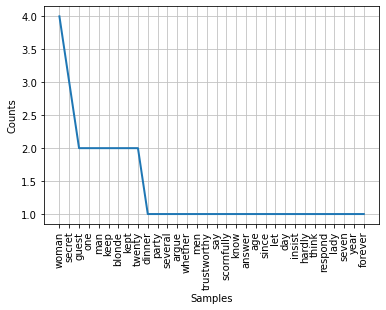

In [35]:
data.frequencies[1].plot()

## 4: Data Analysis
### 4.1 Overview of topics
For the jokes crawled by Stupidstuff and Wocker, output the categories as a list.

In [18]:
data.loc["stupidstuff"].category.unique().tolist()

['Children',
 'Blonde Jokes',
 'Military',
 'Office Jokes',
 'Aviation',
 'Political']

In [19]:
data.loc["wocka"].category.unique().tolist()

['Animal',
 'Other / Misc',
 'Bar',
 'One Liners',
 'Puns',
 'Lawyer',
 'Sports',
 'Medical',
 'News / Politics',
 'Men / Women',
 'Gross',
 'Blond',
 'Yo Momma',
 'Redneck',
 'Religious',
 'At Work',
 'College',
 'Lightbulb',
 'Children',
 'Insults',
 'Knock-Knock']

### 4.2 Overview of numerical values 

Display the average ratings for the categories of Stupidstuff jokes, sorted in ascending order. Then, using Pandas, display an overview of descriptive statistics of Stupidstuff jokes, again grouped by category.

In [20]:
data.loc["stupidstuff"].groupby(["category"]).mean().sort_values(by=['category'])

,rating,score
category,,
Aviation,2.200000,NaN
Blonde Jokes,3.512258,NaN
Children,2.630000,NaN
Military,3.423333,NaN
Office Jokes,3.730000,NaN
Political,3.500000,NaN


In [21]:
data.loc["stupidstuff"].groupby(["category"]).describe()

rating                                                    score  \
              count      mean       std   min    25%   50%   75%   max count   
category                                                                       
Aviation        1.0  2.200000       NaN  2.20  2.200  2.20  2.20  2.20   0.0   
Blonde Jokes   93.0  3.512258  0.782210  1.00  3.000  3.64  4.00  5.00   0.0   
Children        1.0  2.630000       NaN  2.63  2.630  2.63  2.63  2.63   0.0   
Military        3.0  3.423333  0.168622  3.23  3.365  3.50  3.52  3.54   0.0   
Office Jokes    1.0  3.730000       NaN  3.73  3.730  3.73  3.73  3.73   0.0   
Political       1.0  3.500000       NaN  3.50  3.500  3.50  3.50  3.50   0.0   

                                           
             mean std min 25% 50% 75% max  
category                                   
Aviation      NaN NaN NaN NaN NaN NaN NaN  
Blonde Jokes  NaN NaN NaN NaN NaN NaN NaN  
Children      NaN NaN NaN NaN NaN NaN NaN  
Military      NaN NaN NaN NaN NaN NaN NaN  
Office Jokes  NaN NaN NaN NaN NaN NaN NaN  
Political     NaN NaN NaN NaN NaN NaN NaN

## 5 Bonus

Analyze or edit an aspect of your choice of the dataset. For example, for each of the platforms, you can calculate the percentage of jokes that contain a specific word or words of a specific type of word, calculate overall frequencies of the different sources or genres, or edit any other arbitrary question that can be implemented without importing additional modules.